In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [7]:
names=['Center','Left','Right','Steering','Throttle','Break','Speed']       #Defining the Labels
df=pd.read_csv('driving_log.csv',names=names)                               #Reading the CSV file
df.head()                                                                   #Displaying the Dataframe

,Center,Left,Right,Steering,Throttle,Break,Speed
0,C:\Users\abhinav.m\Desktop\IMG\center_2021_04_...,C:\Users\abhinav.m\Desktop\IMG\left_2021_04_2...,C:\Users\abhinav.m\Desktop\IMG\right_2021_04_...,0.0,0.0,0.0,0.000079
1,C:\Users\abhinav.m\Desktop\IMG\center_2021_04_...,C:\Users\abhinav.m\Desktop\IMG\left_2021_04_2...,C:\Users\abhinav.m\Desktop\IMG\right_2021_04_...,0.0,0.0,0.0,0.000080
2,C:\Users\abhinav.m\Desktop\IMG\center_2021_04_...,C:\Users\abhinav.m\Desktop\IMG\left_2021_04_2...,C:\Users\abhinav.m\Desktop\IMG\right_2021_04_...,0.0,0.0,0.0,0.000079
3,C:\Users\abhinav.m\Desktop\IMG\center_2021_04_...,C:\Users\abhinav.m\Desktop\IMG\left_2021_04_2...,C:\Users\abhinav.m\Desktop\IMG\right_2021_04_...,0.0,0.0,0.0,0.000078
4,C:\Users\abhinav.m\Desktop\IMG\center_2021_04_...,C:\Users\abhinav.m\Desktop\IMG\left_2021_04_2...,C:\Users\abhinav.m\Desktop\IMG\right_2021_04_...,0.0,0.0,0.0,0.000079


In [13]:
# Here, we make use of only the center img (Attribute) and the steering angle value(Label).
# Note that we are not taking the right and left images, to make the problem more simpler!
Steering=df['Steering'].values
img=df['Center'].values

In [15]:
# Here we are just checking how many values are Positive, Negative and Zero.
pos=0
neg=0
zero=0
for i in Steering:
    if i>0:
        pos+=1;
    elif i<0:
        neg+=1
    else:
        zero+=1
print('zero = {} , positive value = {} , Negative value = {} '.format(zero,pos,neg))

zero = 4004 , positive value = 530 , Negative value = 532 


[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


<BarContainer object of 25 artists>

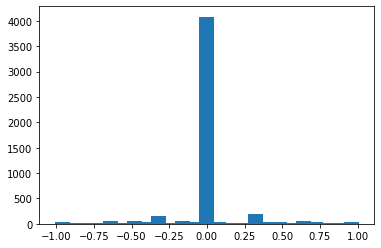

In [34]:
# Now lets plot the steering values as a histogram
hist,bins=np.histogram(Steering,25)
# now, i want to make the 0 steering value come in the center.
center=(bins[1:]+bins[:-1])/2.0
print(center)
plt.bar(center,hist,width=0.1)

In [57]:
# From the above graph, we come to know that the 0 stering values are much heigher than the other steering values. This will make the model biased.
# So, I plan on removing some values of the 0 steering value. I'll keep only around 500-1000 0 steering values.
data=df.values
count=0
new_data=[]
data=shuffle(data)
for i in range(len(data)):
    if data[i][3]==0:
        if count!=500:
            count+=1
            new_data.append(data[i])
        else:
            break

In [58]:
# Now we have the 'new_data' as the array with all zero steering angle
# Let's now append the non zero steering data into the new_data array
for i in range(len(data)):
    if data[i][3]!=0:
        new_data.append(data[i])
len(new_data)

1562

[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96] [ 32   7  19  18  61  19  58  36 153  15  47  30 578  32  23  16 186  44
  35  14  59  31  13   9  27]


<BarContainer object of 25 artists>

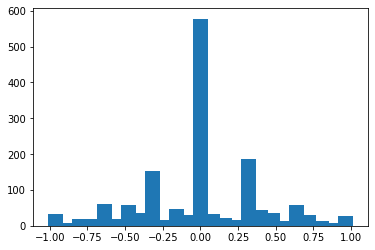

In [64]:
# Now lets plot the new gaph!
steering=[]
for i in new_data:
    steering.append(i[3])
hist,bins=np.histogram(steering,25)
center=(bins[1:]+bins[:-1])/2.0
print(center,hist)
plt.bar(center,hist,width=0.1)

In [66]:
# Lets save the 'new_data' file, so that we can use only that for further processing.
new_data=np.array(new_data)
new_data=pd.DataFrame(new_data)
new_data.to_csv('Processed_Data.csv')
# Note that the data is saved as a csv file.
# The program is continued in 'Processing.ipynb'
# Have a good day!